In [1]:
# followed same sample task in hammingloss file below.
# https://colab.research.google.com/github/harshithere/addons/blob/hammingloss/docs/tutorials/metrics_hammingloss.ipynb

In [2]:
import tensorflow as tf
tf.__version__

'2.6.2'

In [3]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from asymmetric_loss import SigmoidAsymmetricLoss
from matplotlib import pyplot as plt

In [4]:
# Create random input with 1000 samples and 10 features
X = np.random.rand(1000, 10)

In [5]:
# Create random output with 6 labels (2 correct labels)
Y = []
for i in range(0, 1000):
    res = [0]*6
    n = random.randint(0,5)
    m = random.randint(0,5)
    res[n], res[m] = 1, 1
    Y.append(res)
Y = np.array(Y)

In [6]:
# Fitting the model
model = Sequential()
model.add(Dense(8, input_dim=X.shape[1], activation='relu'))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss=SigmoidAsymmetricLoss(), optimizer='adam')
history = model.fit(X, Y, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
8/8 [==============================] - 1s 15ms/step - loss: 0.9063 - val_loss: 0.9264
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.8688 - val_loss: 0.8907
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.8353 - val_loss: 0.8590
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.8061 - val_loss: 0.8310
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7813 - val_loss: 0.8066
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7609 - val_loss: 0.7856
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7427 - val_loss: 0.7684
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7300 - val_loss: 0.7544
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7189 - val_loss: 0.7437
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7112 - val_loss: 0.7360


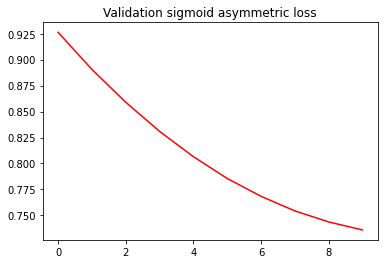

In [7]:
plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"],
             color='red', label='Validation sigmoid asymmetric loss')
plt.title('Validation sigmoid asymmetric loss')
plt.show()

In [8]:
# tf.keras.backend.clear_session()

In [9]:
# implementation in nested functions

def SigmoidAsymmetricLoss2(gamma_neg=4.0, gamma_pos=1.0, clip=0.05, eps=1e-8, from_logits=False):
    """
    x: y_pred (0 ~~ 1 for each label)
    y: y_true (0 or 1 for each label)
    """
    def multi_label_asymmetric_loss_fixed(y_true, y_pred):
        # Set Data Types
        y_pred = tf.convert_to_tensor(y_pred)
        y_true = tf.cast(y_true, dtype=y_pred.dtype)
        # Calculating Probabilities
        if from_logits:
            y_pred = tf.sigmoid(y_pred)
        xs_pos = y_pred
        xs_neg = 1.0 - y_pred
        # Asymmetric Clipping
        if clip is not None and clip > 0:
            xs_neg = xs_neg + clip
            xs_neg = tf.clip_by_value(xs_neg, clip_value_min=tf.reduce_min(xs_neg), clip_value_max=1.0)
        # Basic CE calculation
        xs_pos = tf.clip_by_value(xs_pos, clip_value_min=eps, clip_value_max=tf.reduce_max(xs_pos))
        xs_neg = tf.clip_by_value(xs_neg, clip_value_min=eps, clip_value_max=tf.reduce_max(xs_neg))
        los_pos = y_true * tf.math.log(xs_pos)
        los_neg = (1.0 - y_true) * tf.math.log(xs_neg)
        loss = los_pos + los_neg
        # Asymmetric Focusing
        if gamma_neg > 0 or gamma_pos > 0:
            pt0 = xs_pos * y_true
            pt1 = xs_neg * (1.0 - y_true) # pt = p if t > 0 else 1-p
            pt = pt0 + pt1
            one_sided_gamma = gamma_pos * y_true + gamma_neg * (1.0 - y_true)
            one_sided_w = tf.math.pow(1.0 - pt, one_sided_gamma)
            loss *= one_sided_w
        return -tf.math.reduce_sum(loss, axis=-1)
    return multi_label_asymmetric_loss_fixed

In [10]:
# Fitting the model
model2 = Sequential()
model2.add(Dense(8, input_dim=X.shape[1], activation='relu'))
model2.add(Dense(6, activation='sigmoid'))
model2.compile(loss=SigmoidAsymmetricLoss2(), optimizer='adam')
history2 = model2.fit(X, Y, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
8/8 [==============================] - 1s 13ms/step - loss: 0.7375 - val_loss: 0.7847
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7297 - val_loss: 0.7770
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7236 - val_loss: 0.7711
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7189 - val_loss: 0.7669
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7149 - val_loss: 0.7632
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7115 - val_loss: 0.7598
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7086 - val_loss: 0.7575
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7060 - val_loss: 0.7551
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7037 - val_loss: 0.7521
Epoch 10/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7016 - val_loss: 0.7485


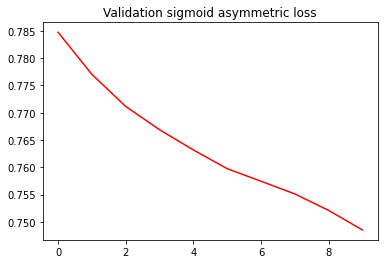

In [11]:
plt.plot(range(len(history2.history["val_loss"])), history2.history["val_loss"],
             color='red', label='Validation sigmoid asymmetric loss')
plt.title('Validation sigmoid asymmetric loss')
plt.show()